## Breast Cancer Classification

#### Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:
print(cancer['data'] )

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [13]:
df_cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']], columns=np.append(cancer['feature_names'], 'target' ))
df_cancer.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [14]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

**The Dataframe has 569 samples & 31 features along with target**<br>
**There are no missing values & No categorical values**

In [15]:
df_cancer.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [16]:
pp.ProfileReport(df_cancer)

In [17]:
profile = df_cancer.profile_report()
rejected_variables = profile.get_rejected_variables(threshold=0.9)

In [18]:
rejected_variables

['mean_concavity',
 'mean_perimeter',
 'mean_radius',
 'perimeter_error',
 'radius_error',
 'worst_area',
 'worst_concave_points',
 'worst_perimeter',
 'worst_radius',
 'worst_texture']

In [22]:
tot_variables = df_cancer.columns.tolist()
tot_variables

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concavity',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension',
 'radius_error',
 'texture_error',
 'perimeter_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'concavity_error',
 'concave_points_error',
 'symmetry_error',
 'fractal_dimension_error',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave_points',
 'worst_symmetry',
 'worst_fractal_dimension',
 'target']

In [31]:
imp_variables = list(filter(lambda i : i not in rejected_variables,tot_variables ))
imp_variables

['mean_texture',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension',
 'texture_error',
 'area_error',
 'smoothness_error',
 'compactness_error',
 'concavity_error',
 'concave_points_error',
 'symmetry_error',
 'fractal_dimension_error',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_symmetry',
 'worst_fractal_dimension',
 'target']

In [32]:
print('Total number of variables : ',len(tot_variables) )
print('Number of Rejected variables : ',len(rejected_variables) )
print('Number of imp variables : ',len(imp_variables) )

Total number of variables :  31
Number of Rejected variables :  10
Number of imp variables :  21


**Among 31 feaures , 10 feaures are Highly correlated with other. so they were removed from analysis**

In [33]:
df_cancer = df_cancer[imp_variables]
df_cancer.shape

(569, 21)

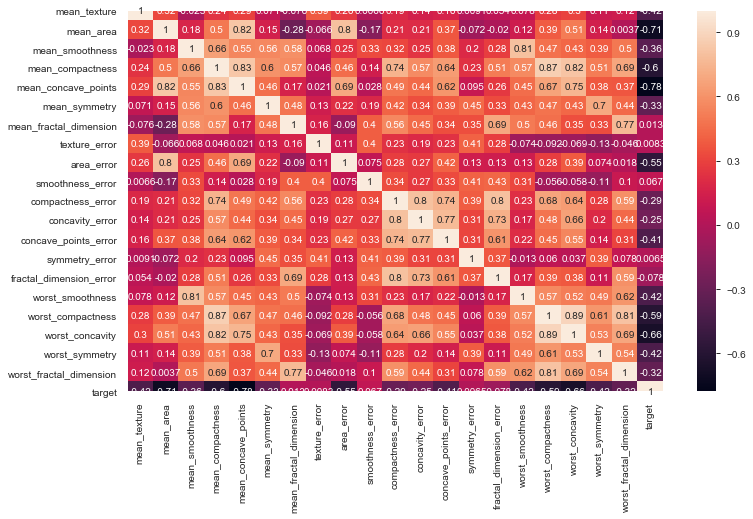

In [35]:
plt.figure(figsize=(12,7))
sns.heatmap(df_cancer.corr(), annot= True)

In [36]:
df_cancer.columns

Index(['mean_texture', 'mean_area', 'mean_smoothness', 'mean_compactness',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'texture_error', 'area_error', 'smoothness_error', 'compactness_error',
       'concavity_error', 'concave_points_error', 'symmetry_error',
       'fractal_dimension_error', 'worst_smoothness', 'worst_compactness',
       'worst_concavity', 'worst_symmetry', 'worst_fractal_dimension',
       'target'],
      dtype='object')

In [39]:
mean_features = [i for i in df_cancer.columns if i.startswith('mean_')]
mean_features

['mean_texture',
 'mean_area',
 'mean_smoothness',
 'mean_compactness',
 'mean_concave_points',
 'mean_symmetry',
 'mean_fractal_dimension']

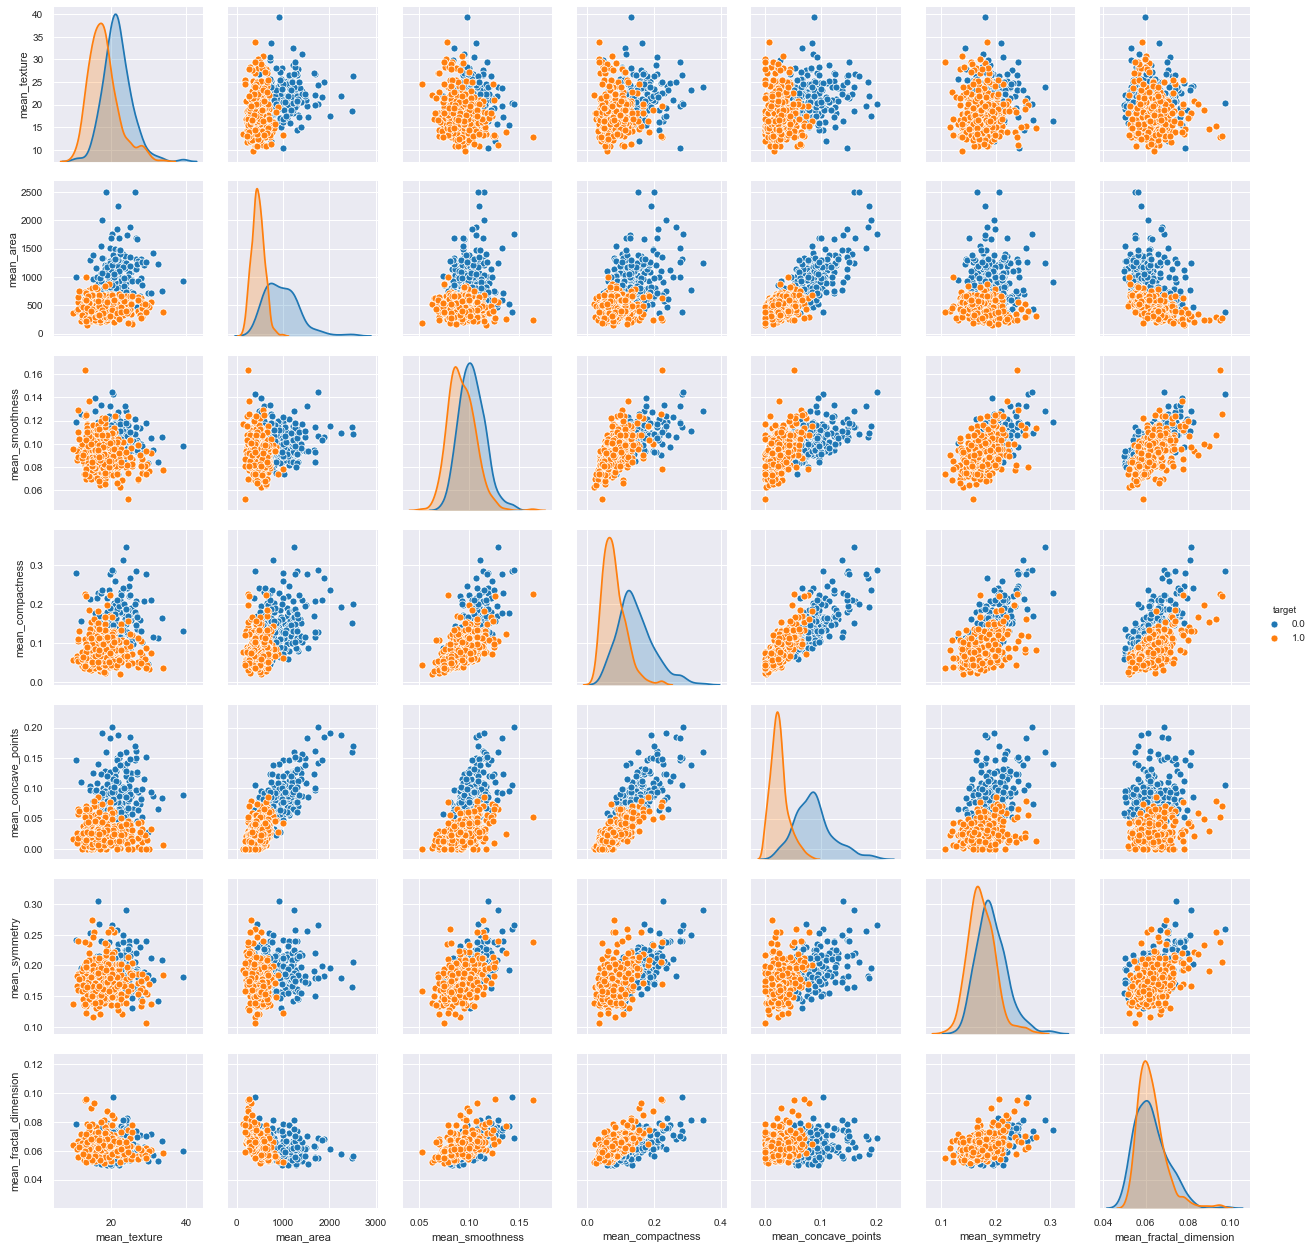

In [45]:
#sns.pairplot(df_cancer , vars=[mean_features], hue= 'target')
sns.pairplot(df_cancer, hue = 'target', vars = mean_features )

In [52]:
df_cancer.groupby('target')[mean_features].mean()

mean_texture   mean_area  mean_smoothness  mean_compactness  \
target                                                                
0.0        21.604906  978.376415         0.102898          0.145188   
1.0        17.914762  462.790196         0.092478          0.080085   

        mean_concave_points  mean_symmetry  mean_fractal_dimension  
target                                                              
0.0                0.087990       0.192909                0.062680  
1.0                0.025717       0.174186                0.062867

* **From above data it is clearly visible thay malignent cells have higher "mean_area, mean_compactness, mean_concave_points" compared to Benign tumors***

* **Nearly all the mean features shows good correaltion among each other and analysis w.r.t to target**

#### Machine Learning model

**As we have very small sample data we split data to train & test with no CV**

In [55]:
X = df_cancer.drop('target', axis = 1)
y = df_cancer['target'] 

In [57]:
print(X.head(3))
print('*'*20)
print(y.head())

   mean_texture  mean_area  mean_smoothness  mean_compactness  \
0         10.38     1001.0          0.11840           0.27760   
1         17.77     1326.0          0.08474           0.07864   
2         21.25     1203.0          0.10960           0.15990   

   mean_concave_points  mean_symmetry  mean_fractal_dimension  texture_error  \
0              0.14710         0.2419                 0.07871         0.9053   
1              0.07017         0.1812                 0.05667         0.7339   
2              0.12790         0.2069                 0.05999         0.7869   

   area_error  smoothness_error  compactness_error  concavity_error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   
2       94.03          0.006150            0.04006          0.03832   

   concave_points_error  symmetry_error  fractal_dimension_error  \
0               0.01587         0.03003                 0.006193 

In [54]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [70]:
X_train.name = 'X_train'
X_test.name = 'X_test'
y_train.name = 'y_train'
y_test.name = 'y_test'

for i in [X_train, X_test, y_train, y_test]:
    print('The shape of {} is {}'.format(i.name,i.shape))

The shape of X_train is (455, 20)
The shape of X_test is (114, 20)
The shape of y_train is (455,)
The shape of y_test is (114,)


##### Check the distribution of target variable across train & test

In [71]:
tr_df = pd.DataFrame({'y_train':y_train })
ts_df = pd.DataFrame({'y_test':y_test })

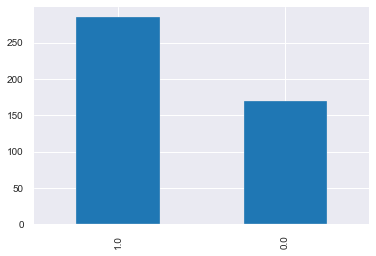

In [73]:
tr_df['y_train'].value_counts().plot('bar')

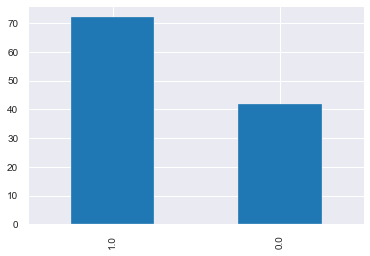

In [74]:
ts_df['y_test'].value_counts().plot('bar')

**This shows that the target Malgnent & Benign tumors are correctly distributed across train & test datasets**

#### Support Vector Machine (SVM)

In [104]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [105]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
clas_report = classification_report(y_test, y_predict)

In [109]:
print(cm)
print('*'*20)
print(clas_report)
accuracy = (cm[0][0] + cm[1][1]) / cm.sum() *100
print( "The accuracy of the above model is {} % :".format(np.round(accuracy,2) ))

[[ 5 37]
 [ 3 69]]
********************
              precision    recall  f1-score   support

         0.0       0.62      0.12      0.20        42
         1.0       0.65      0.96      0.78        72

    accuracy                           0.65       114
   macro avg       0.64      0.54      0.49       114
weighted avg       0.64      0.65      0.56       114

The accuracy of the above model is 64.91 % :


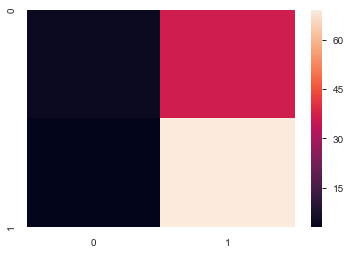

In [79]:
sns.heatmap(cm)

* **This is a raw model, so the results were not good**
* **We will improve this model by Feaure Scaling and selecting the best paramaeters**

#### Improving the Model - Feature scaling

In [88]:
# Feature scaling by m

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_scal = min_max_scaler.fit_transform(X_train)
X_test_scal = min_max_scaler.transform(X_test)

In [110]:
svc_model = SVC()
svc_model.fit(X_train_scal, y_train)

y_predict = svc_model.predict(X_test_scal)
cm = confusion_matrix(y_test, y_predict)
clas_report = classification_report(y_test, y_predict)

print(cm)
print('*'*20)
print(clas_report)
accuracy = (cm[0][0] + cm[1][1]) / cm.sum() *100
print( "The accuracy of the above model is {} % :".format(np.round(accuracy,2) ))


[[37  5]
 [ 1 71]]
********************
              precision    recall  f1-score   support

         0.0       0.97      0.88      0.93        42
         1.0       0.93      0.99      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

The accuracy of the above model is 94.74 % :


**With the Feature scaling the accuracy of the model was increased from 64% to 94%. Lets further improve the model by Parameter tuning**

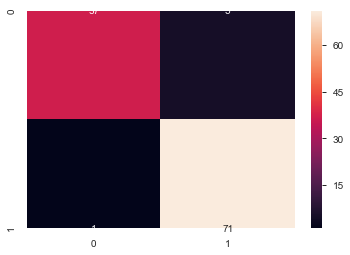

In [93]:
sns.heatmap(cm, annot=True)

#### Further Improving the Model - Parameter tuning

In [112]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [114]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid,refit=True,verbose=4)
grid.fit(X_train_scal,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.908, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.928, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.934, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.684, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.691, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.669, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.702, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.625, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.625, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.629, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.954, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.993, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [115]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [116]:
y_predict = grid.predict(X_test_scal)
cm = confusion_matrix(y_test, y_predict)
clas_report = classification_report(y_test, y_predict)

print(cm)
print('*'*20)
print(clas_report)
accuracy = (cm[0][0] + cm[1][1]) / cm.sum() *100
print( "The accuracy of the above model is {} % :".format(np.round(accuracy,2) ))


[[41  1]
 [ 2 70]]
********************
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        42
         1.0       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

The accuracy of the above model is 97.37 % :


**With the Parameter Tuning the accuracy of the model was futher increased from 97%. But Type II error increased compared to earlier. So will check with all features**

In [117]:
df_cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']], columns=np.append(cancer['feature_names'], 'target' ))

X = df_cancer.drop('target', axis = 1)
y = df_cancer['target'] 

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

min_max_scaler = MinMaxScaler()
X_train_scal = min_max_scaler.fit_transform(X_train)
X_test_scal = min_max_scaler.transform(X_test)

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid,refit=True,verbose=4)
grid.fit(X_train_scal,y_train)

y_predict = grid.predict(X_test_scal)
cm = confusion_matrix(y_test, y_predict)
clas_report = classification_report(y_test, y_predict)

print(cm)
print('*'*20)
print(clas_report)
accuracy = (cm[0][0] + cm[1][1]) / cm.sum() *100
print( "The accuracy of the above model is {} % :".format(np.round(accuracy,2) ))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.954, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.947, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.954, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.908, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.882, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.887, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.908, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.895, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.887, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.625, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.625, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.629, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished


**Though on using complete data with all the features there was no futher increase of accuracy nor change in Type II Error**

#### Summary

* The accuracy of the model was increased to 97% with Feature scaling and Paramter Tuning
* There are some Type errors but it constitutes of less of 2% of the total records